# Linear Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Linear regression using the Normal Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

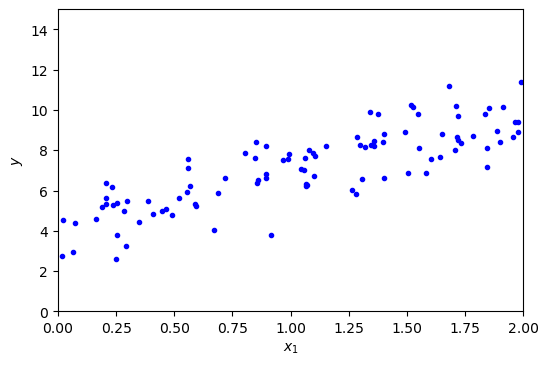

In [3]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")
ax.set(xlabel="$x_1$", ylabel="$y$")

xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.1970219],
       [2.7772893]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1970219 ],
       [9.75160049]])

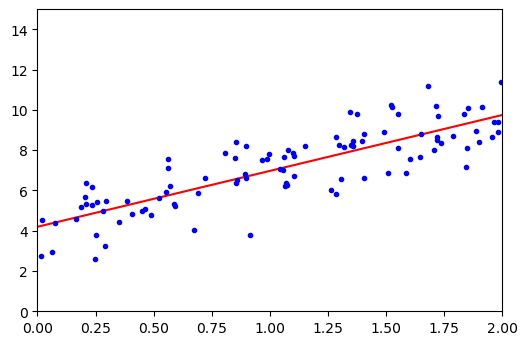

In [7]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X_new, y_predict, "r-")
ax.plot(X, y, "b.")
xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.show()

The figure in the book actually corresponds to the following code, with a legend and axis labels:

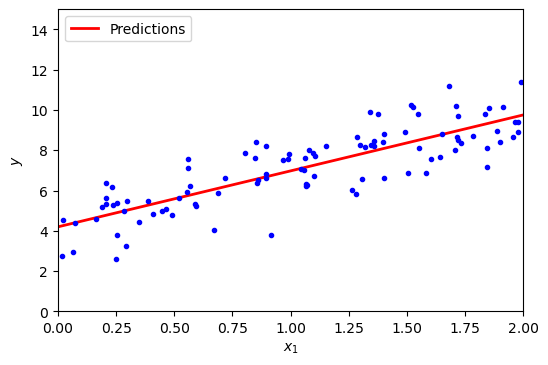

In [8]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
ax.plot(X, y, "b.")
xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.legend(loc="upper left", fontsize='medium')

plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.1970219]), array([[2.7772893]]))

In [11]:
lin_reg.predict(X_new)

array([[4.1970219 ],
       [9.75160049]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.1970219],
       [2.7772893]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.1970219],
       [2.7772893]])

# Linear regression using batch gradient descent

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients

In [15]:
theta

array([[4.1970219],
       [2.7772893]])

In [16]:
X_new_b.dot(theta)

array([[4.1970219 ],
       [9.75160049]])

In [17]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, ax, theta_path=None):
    m = len(X_b)
    ax.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    xmin, xmax, ymin, ymax = [0, 2, 0, 15]
    ax.set(xlabel="$x_1$",
           xlim=(xmin, xmax),
           ylim=(ymin, ymax),
           title=f"$\eta = {eta}$")

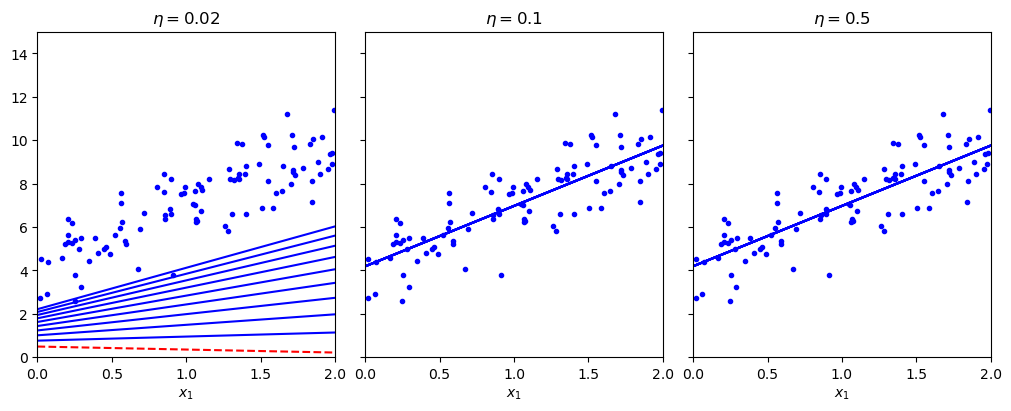

In [18]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

_, axes = plt.subplots(1,
                       3,
                       figsize=(10, 4),
                       dpi=100,
                       sharey=True,
                       constrained_layout=True)

etas = [.02, .1, .5]
theta_paths = [None, theta_path_bgd, None]

for ax, eta, theta_path in zip(axes.flatten(), etas, theta_paths):
    plot_gradient_descent(theta, eta=eta, ax=ax, theta_path=theta_path)

plt.show()

# Stochastic Gradient Descent

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

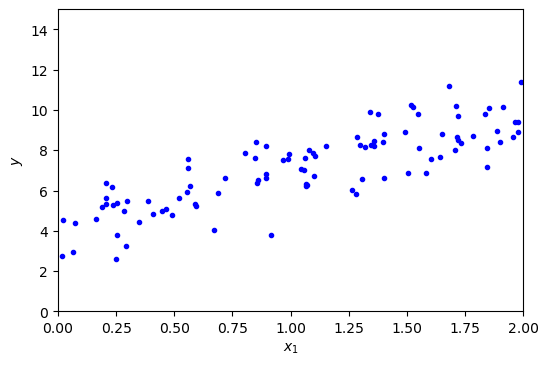

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            ax.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")

xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=(xmin, xmax), ylim=(ymin, ymax))

plt.show()

In [21]:
theta

array([[4.20988962],
       [2.79747912]])

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-3,
                       penalty=None,
                       eta0=0.1,
                       random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1473667]), array([2.71646135]))

# Mini-batch gradient descent

In [25]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta -= eta * gradients
        theta_path_mgd.append(theta)

In [26]:
theta

array([[4.2148738 ],
       [2.78773765]])

In [27]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

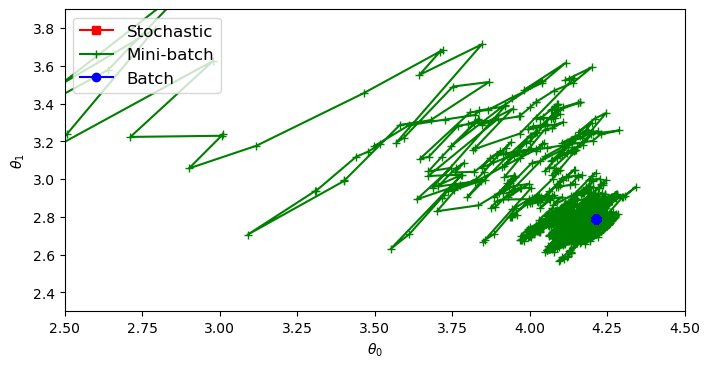

In [28]:
_, ax = plt.subplots(figsize=(8, 4), dpi=100)

theta_paths = [theta_path_bgd, theta_path_sgd, theta_path_mgd]
styles = ["r-s", "g-+", "b-o"]
labels = ["Stochastic", "Mini-batch", "Batch"]

for thetas, style, lb in zip(theta_paths, styles, labels):
    ax.plot(thetas[:, 0], thetas[:, 1], style, label=lb)

ax.legend(loc="upper left", fontsize='large')

xmin, xmax, ymin, ymax = [2.5, 4.5, 2.3, 3.9]
ax.set(xlabel=r"$\theta_0$",
       ylabel=r"$\theta_1$",
       xlim=(xmin, xmax),
       ylim=(ymin, ymax))

plt.show()

# Polynomial regression

In [29]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

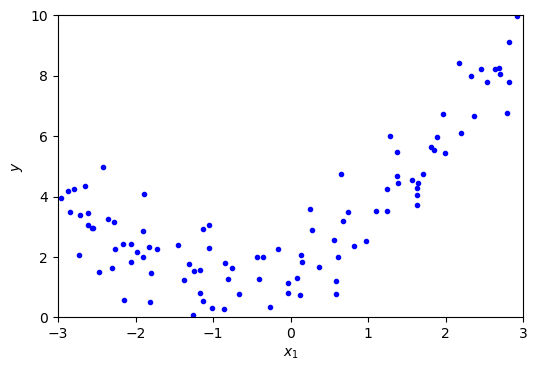

In [30]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")
xmin, xmax, ymin, ymax = [-3, 3, 0, 10]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=[xmin, xmax], ylim=[ymin, ymax])
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [32]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [33]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

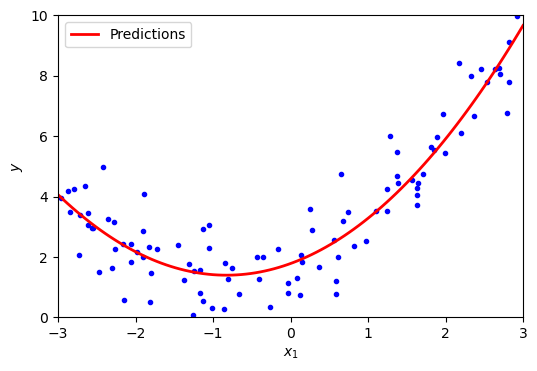

In [35]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")
ax.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

xmin, xmax, ymin, ymax = [-3, 3, 0, 10]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=[xmin, xmax], ylim=[ymin, ymax])
ax.legend(loc="upper left", fontsize='medium')

plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

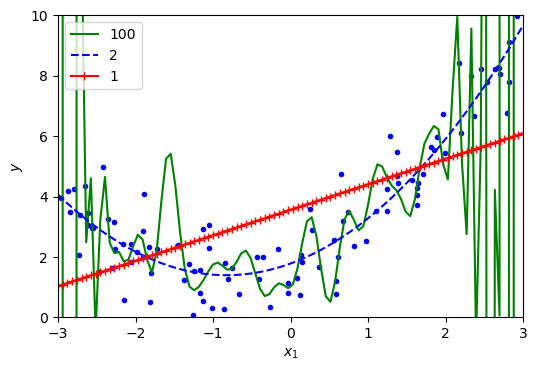

In [37]:
styles = ["g-", "b--", "r-+"]
degrees = [100, 2, 1]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.", linewidth=3)

for style, d in zip(styles, degrees):
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_new = polynomial_regression.predict(X_new)
    ax.plot(X_new, y_new, style, label=str(d))

xmin, xmax, ymin, ymax = [-3, 3, 0, 10]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=[xmin, xmax], ylim=[ymin, ymax])
ax.legend(loc="upper left")

plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
def plot_learning_curves(model, X, y, ax):
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    ax.plot(np.sqrt(train_errors), "r-+", label="train")
    ax.plot(np.sqrt(val_errors), "b-", label="val")
    ax.legend(loc="upper right", fontsize='medium')
    ax.set(xlabel="Training set size", ylabel="RMSE")

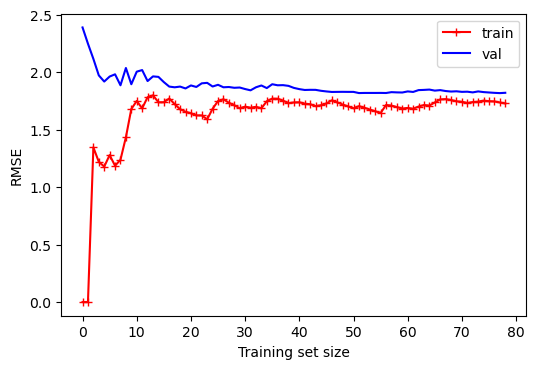

In [40]:
lin_reg = LinearRegression()

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_learning_curves(lin_reg, X, y, ax)
plt.show()

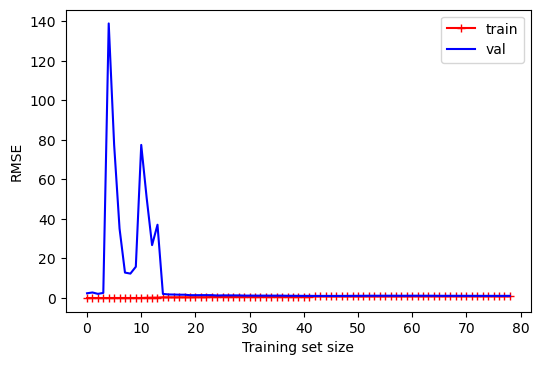

In [41]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_learning_curves(polynomial_regression, X, y, ax)
plt.show()

# Regularized models

In [42]:
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet

In [43]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [44]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [45]:
def plot_model(model_class, αs, ax, polynomial=False, **model_kargs):

    styles = ("b-", "g--", "r:")

    for α, style in zip(αs, styles):
        model = model_class(α, **model_kargs) if α > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features",
                 PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regl = model.predict(X_new)
        ax.plot(X_new, y_new_regl, style, label=f"α = {α}")

    ax.plot(X, y, "b.", linewidth=3)
    ax.set(xlabel="$x_1$")
    ax.legend(loc="upper left", fontsize='medium')

In [46]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


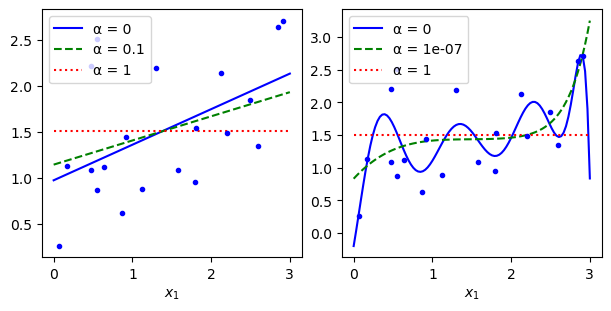

In [47]:
_, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=100, constrained_layout=True)

plot_model(Lasso, αs=(0, 0.1, 1), ax=axes[0], random_state=42, tol=0.0001)
plot_model(Lasso,
           αs=(0, 10**-7, 1),
           polynomial=True,
           ax=axes[1],
           random_state=42,
           tol=0.0001)
ax.set(ylabel="$y$")

plt.show()

In [48]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [49]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [50]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50],
                                                  y[:50].ravel(),
                                                  test_size=0.5,
                                                  random_state=10)


## Early stopping

In [51]:
from copy import deepcopy

In [52]:
poly_scaler = Pipeline([("poly_features",
                         PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Create the graph:

In [53]:
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

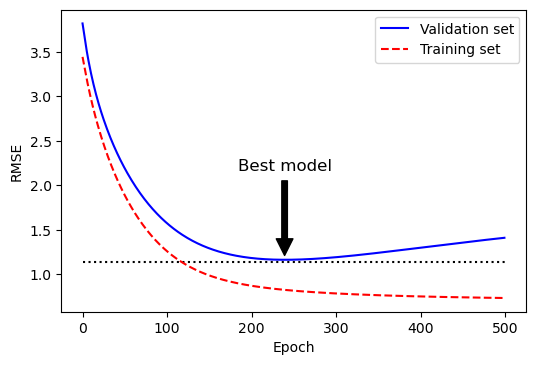

In [54]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.annotate(
    'Best model',
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 1),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize='large',
)

best_val_rmse -= 0.03
ax.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:")
ax.plot(np.sqrt(val_errors), "b-", label="Validation set")
ax.plot(np.sqrt(train_errors), "r--", label="Training set")
ax.legend(loc="upper right")
ax.set(xlabel="Epoch", ylabel="RMSE")

plt.show()

In [55]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [56]:
def make_mesh(xlims, ylims, h):
    x_min, x_max = xlims
    y_min, y_max = ylims
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))
    return xx, yy

In [57]:
xlims = [-1, 3]
ylims = [-1.5, 1.5]

t1, t2 = make_mesh(xlims, ylims, h=500)
T = np.c_[t1.flatten(), t2.flatten()]

Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [58]:
def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2 / len(X) * X.T.dot(
            X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)

    return np.array(path)

In [61]:
def plot_grid(ax, path_N):
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.plot(0, 0, "ys")
    # ax.axis([t1a, t1b, t2a, t2b])
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")

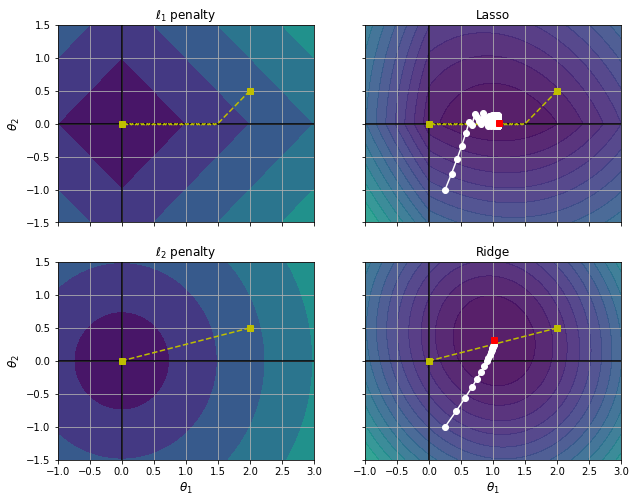

In [62]:
_, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

l1 = [2, 0]
l2 = [0, 2]
titles = ["Lasso", "Ridge"]
Ns = [N1, N2]

for ind, (N, l1, l2, title) in enumerate(zip(Ns, l1, l2, titles)):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) -
                                                     np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) -
                                                      np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]),
                      Xr,
                      yr,
                      np.sign(l1) / 3,
                      np.sign(l2),
                      core=0)

    ax = axes[ind, 0]
    plot_grid(ax, path_N)
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.set_title(f"$\ell_{ind + 1}$ penalty", fontsize='large')
    if ind == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize='large')
    ax.set_ylabel(r"$\theta_2$", fontsize='large')

    ax = axes[ind, 1]
    plot_grid(ax, path_N)
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize='large')
    if ind == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize='large')

plt.show()

# Logistic regression

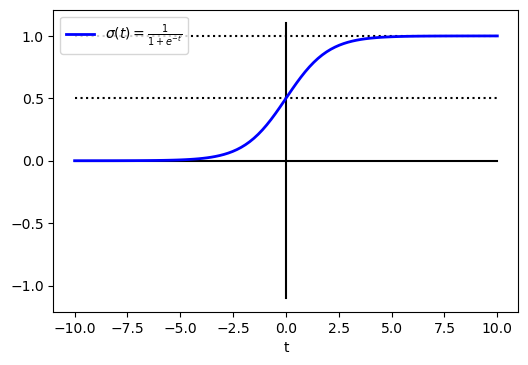

In [63]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot([-10, 10], [0, 0], "k-")
ax.plot([-10, 10], [0.5, 0.5], "k:")
ax.plot([-10, 10], [1, 1], "k:")
ax.plot([0, 0], [-1.1, 1.1], "k-")
ax.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

ax.set(xlabel="t")
ax.legend(loc="upper left")
plt.show()

In [64]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [65]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [66]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

/var/folders/1q/m8l_wvxd5dl8kccgv4xrsxtr0000gn/T/ipykernel_16897/2130579894.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

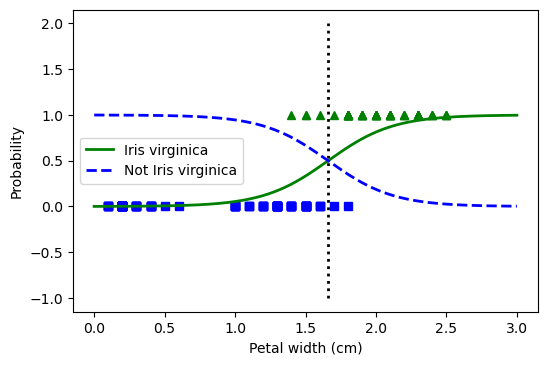

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X[y == 0], y[y == 0], "bs")
ax.plot(X[y == 1], y[y == 1], "g^")
ax.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
ax.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
ax.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

ax.set(xlabel="Petal width (cm)", ylabel="Probability")
ax.legend(loc="center left", fontsize='medium')
plt.show()

In [70]:
decision_boundary

array([1.66066066])

In [71]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [72]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

/var/folders/1q/m8l_wvxd5dl8kccgv4xrsxtr0000gn/T/ipykernel_16897/3633516347.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


LogisticRegression(C=10000000000, random_state=42)

In [73]:
def make_mesh(xlims, ylims, h):
    x = np.arange(xlims[0], xlims[1], h)
    y = np.arange(ylims[0], ylims[1], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

In [74]:
def make_zz(x0, x1):
    X_new = np.c_[x0.flatten(), x1.flatten()]
    y_proba = log_reg.predict_proba(X_new)
    zz = y_proba[:, 1].reshape(x0.shape)
    return zz

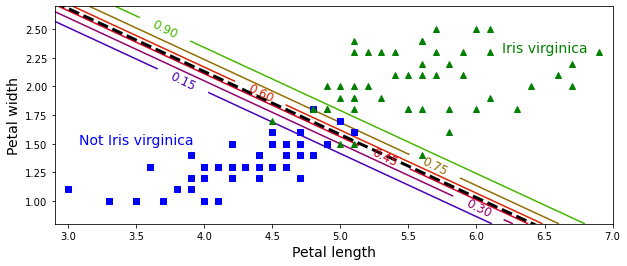

In [75]:

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [76]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [77]:
from matplotlib.colors import ListedColormap

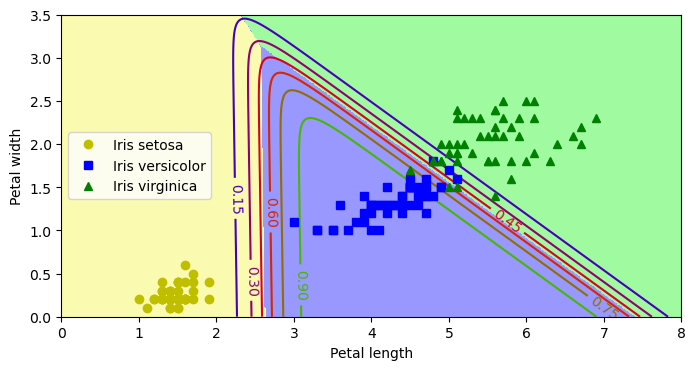

In [78]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

_, ax = plt.subplots(figsize=(8, 4), dpi=100)

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

for ind, (style, lb) in enumerate(zip(styles, labels)):
    ax.plot(X[y == ind, 0], X[y == ind, 1], style, label=lb)

ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="center left", fontsize='medium')

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.flatten(), x1.flatten()]

y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)
ax.contourf(x0, x1, zz, cmap=custom_cmap)

y_proba = softmax_reg.predict_proba(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
contour = ax.contour(x0, x1, zz1, cmap=plt.cm.brg)
ax.clabel(contour, inline=True)
plt.show()

In [79]:
softmax_reg.predict([[5, 2]])

array([2])

In [80]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercise solutions

## 12. Batch Gradient Descent with early stopping for Softmax Regression

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [81]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [82]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [83]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [84]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [85]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [86]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [87]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [88]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [89]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [90]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [91]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta -= eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [92]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [93]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [94]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [95]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [96]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399382
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [97]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

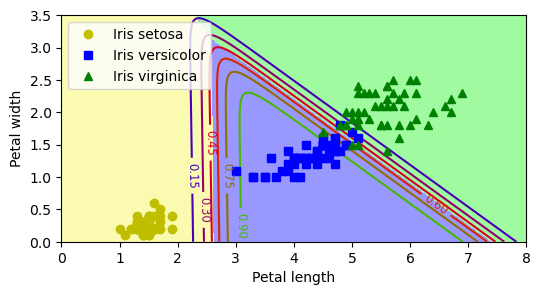

In [98]:
_, ax = plt.subplots(figsize=(6, 3), dpi=100)

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

for ind, (style, lb) in enumerate(zip(styles, labels)):
    ax.plot(X[y == ind, 0], X[y == ind, 1], style, label=lb)

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

ax.contourf(x0, x1, zz, cmap=custom_cmap)
contour = ax.contour(x0, x1, zz1, cmap=plt.cm.brg)
ax.clabel(contour, inline=1, fontsize='small')
ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="upper left", fontsize='medium')

plt.show()

And now let's measure the final model's accuracy on the test set:

In [99]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.